<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)<br>
Aluno [Rafael Barbosa](https://www.linkedin.com/in/barbosa89/)


---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [50]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'
with open(NOME_ARQUIVO_FONTE, 'r') as arquivo:
    data = arquivo.read()

fonte = BeautifulSoup(data, 'lxml')


/usr/local/lib/python3.10/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [ ]:
# visualize os resultados

fonte

In [52]:
# manipule os dados
estados = fonte.find_all('estado')

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'
with open(NOME_ARQUIVO_DESTINO, 'w') as arquivo:
    arquivo.write('estado;sigla;regiao\n')
    for estado in estados:
        nome = estado.find('nome').text
        sigla = estado.find('sigla').text
        regiao = estado.find('regiao').text
        # escrever o conteudo extraido no arquivo estados-limpo.csv
        # separados por ;
        arquivo.write(f'{nome};{sigla};{regiao}\n')


### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [53]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

fonte = pd.read_csv(NOME_ARQUIVO_FONTE,delimiter=",")

In [ ]:
# visualize os resultados
fonte.head()


In [55]:
# manipule os dados

# Filter the data to only include rows with the value 2010 in the 'Censo' column
fonte = fonte[fonte['Censo'] == 2010]

# Select only the columns 'estado', 'nome', 'Pop_est_2009', 'PIB' and 'PIB_percapita'
fonte = fonte[['UF', 'nome', 'Pop_est_2009', 'PIB', 'PIB_percapita']]

# Rename the columns to match the desired output format
fonte.columns = ['estado', 'cidade', 'populacao', 'pib', 'pib_percapita']


In [56]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'
# Save the extracted data to the cidades-limpo.csv file
fonte.to_csv(NOME_ARQUIVO_DESTINO, sep=';', index=False)


### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-bruto.csv` com os dados do arquivo `cidades-bruto.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [107]:
# solução do exercício 1.3

import pandas as pd

# Leitura dos arquivos
estados_df = pd.read_csv('estados-limpo.csv', sep=';')
cidades_df = pd.read_csv('cidades-limpo.csv', sep=';')

estados_df['estado'] = estados_df['estado'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
cidades_df['estado'] = cidades_df['estado'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

# Combinação dos dataframes
brasil_df = pd.merge(estados_df, cidades_df, on='estado', how='outer')

# Salvamento dos dados
brasil_df.to_csv('brasil.csv', sep=';', index=False)


---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [108]:
# solução do exercício 2.1
import pandas as pd

brasil_df = pd.read_csv('brasil.csv', sep=';')

### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [109]:
# # código para responder a pergunta

brasil_df.nlargest(10, 'populacao')[['cidade', 'populacao']]


,cidade,populacao
4403,São Paulo,11037593
2747,Rio de Janeiro,6186710
246,Salvador,2998056
802,Brasília,2606885
766,Fortaleza,2505552
5447,Belo Horizonte,2452617
2056,Curitiba,1851215
142,Manaus,1738641
2446,Recife,1561659
1687,Belém,1437600


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [110]:
# código para responder a pergunta
brasil_df[brasil_df['regiao'] == 'NORDESTE'].nsmallest(5, 'pib_percapita')[['cidade', 'pib_percapita']]

,cidade,pib_percapita
1319,São Vicente Ferrer,1929.969971
1214,Cajapió,2203.830078
2512,Dom Inocêncio,2358.239990
1338,Timbiras,2368.159912
1235,Axixá,2416.969971


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [111]:
# código para responder a pergunta
brasil_df[brasil_df['estado'] == 'SAO PAULO'].nlargest(15, 'pib')[['cidade', 'pib']]

,cidade,pib
4403,São Paulo,389317152.0
4355,Guarulhos,32473828.0
4472,Campinas,31654720.0
4238,Osasco,31616452.0
3942,São Bernardo do Campo,28935768.0
4476,Barueri,26908070.0
3900,Santos,22546134.0
4126,São José dos Campos,22018042.0
4146,Jundiaí,16585137.0
3948,Santo André,14709603.0


 - Qual é o PIB do estado de Santa Catarina?

In [112]:
# código para responder a pergunta
brasil_df[brasil_df['estado'] == 'SANTA CATARINA']['pib'].agg('sum')


129806256.75195317

 - Qual é o população da região sul?

In [113]:
# código para responder a pergunta
brasil_df[brasil_df['regiao'] == 'SUL']['populacao'].sum()

27719118

 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [114]:
# código para responder a pergunta
brasil_df[brasil_df['estado'] == 'MATO GROSSO DO SUL']['pib_percapita'].mean()


14458.896859975644

 - Qual é a população do Brasil?

In [115]:
# código para responder a pergunta
brasil_df['populacao'].sum()

191176146

### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

<Axes: title={'center': '10 cidades menos populosas do Brasil'}, xlabel='cidade'>

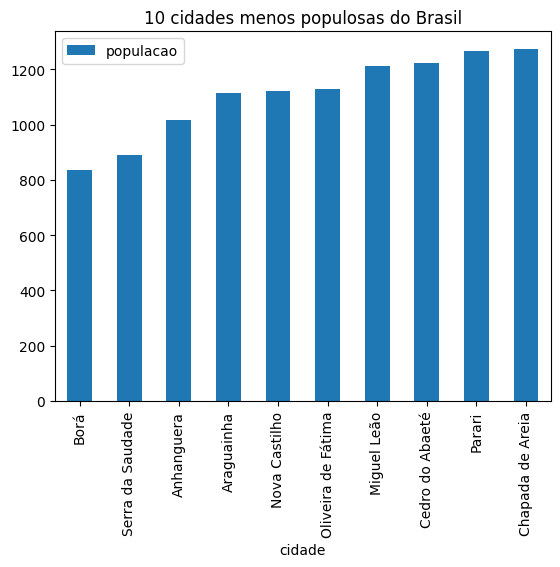

In [116]:
# código para gerar a visualização
brasil_df.nsmallest(10, 'populacao')[['cidade', 'populacao']].plot(kind='bar', x='cidade', y='populacao', title='10 cidades menos populosas do Brasil')


 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

<Axes: title={'center': 'Proporção da população do Brasil por região'}, ylabel='populacao'>

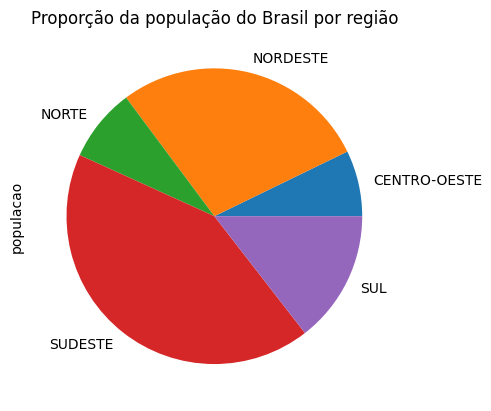

In [117]:
# código para gerar a visualização
brasil_df.groupby('regiao')['populacao'].sum().plot(kind='pie', title='Proporção da população do Brasil por região')